# Building up from the gas phase.
For this we'll be using the particula python package that is development by my colleagues and myself. 
For that we'll need to install it first.

The package information can be found here: https://uncscode.github.io/particula/intro.html

The github repo is here: https://github.com/uncscode/particula

In [1]:
# !pip install particula

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import particula as particula

In [2]:
particula.__version__ # check version 0.10

'0.0.10'

 ## Gas phase


In [3]:
from particula import u
from particula.environment import Environment

In [5]:
Env_sample = Environment()

help(Env_sample)

Help on Environment in module particula.environment object:

class Environment(SharedProperties)
 |  Environment(**kwargs)
 |  
 |  creating the environment class
 |  
 |  For now, the environment class takes properties such as
 |  temperature and pressure to calculate derived properties
 |  such as viscosity and mean free path.
 |  
 |  Method resolution order:
 |      Environment
 |      SharedProperties
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Initiate the environment class with base attrs.
 |  
 |  dynamic_viscosity(self)
 |      Returns the dynamic viscosity in Pa*s.
 |  
 |  mean_free_path(self)
 |      Returns the mean free path in m.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SharedProperties:
 |  
 |  dilution_rate_coefficient(self)
 |      get the dilution rate coefficient
 |  
 |  ----------------------------------------------------------------------
 |  Da

In [6]:
print("temperature is ", Env_sample.temperature) # will print 300 K
print("pressure is ", Env_sample.pressure) # %%

temperature is  298.15 kelvin
pressure is  101325 kilogram / meter / second ** 2


 That gives the default values for temperature and pressure.
 but what if we want to change it?

In [8]:
Env_sample.temperature = 250 * u.K

print("temperature is ", Env_sample.temperature) # will print 300 K

temperature is  250 kelvin


numpy.ndarray

 what about these units? can we change them?

In [12]:
print("temperature is ", Env_sample.temperature.to(u.degC))
print("temperature is ", Env_sample.temperature.to(u.degF))

temperature is  -23.149999999999977 degree_Celsius
temperature is  -9.670000000000021 degree_Fahrenheit


 This is the pint package that is used in the particula package.
 It is a very useful package for handling units.
 It's documentation can be found here: https://pint.readthedocs.io/en/stable/

 You can change the temperature without `u.K` but is may break things later on.

 There are two main aspects the environmental class can calculate:
 1. The dynamic viscosity
 2. The mean free path

 ### Dynamic viscosity
 The dynamic viscosity is a property of the fluid, defining the resistance of the fluid to its own movement. The dynamic viscosity is calculated using the Sutherland formula ([reference](https://resources.wolframcloud.com/FormulaRepository/resources/Sutherlands-Formula)). The function can be found and is documented in `util.dynamic_viscosity.py`. It takes inputs of `temperature`, `reference_viscosity`, `reference_temperature`, and `sutherland_constant`. It returns a value for the dynamic viscosity at those variables. At default conditions (298.15 K and 101325 Pa), the dynamic viscosity is approximately 1.84e-5 kg/m/s. The Sutherland formula is
 $$
 \mu = \frac{\mu_{0}\, (T/T_{0})^{3/2}\, (T_{0} + C)}{C + T}
 $$
 where $\mu$ is the dynamic viscosity, $\mu_{0}$ is the reference dynamic viscosity, $T$ is temperature, $T_{0}$ is the reference temperature, and $C$ is the Sutherland constant.

In [13]:
Env_sample.dynamic_viscosity()

array(1.59905239e-05) <Unit('kilogram / meter / second')>

 or in more traditional units

In [14]:
Env_sample.dynamic_viscosity().to(u.Pa * u.s)

array(1.59905239e-05) <Unit('pascal * second')>

 lets change the temperature and see what happens

In [18]:
Env_sample.temperature = 500 *u.K
Env_sample.dynamic_viscosity().to(u.Pa * u.s)

array(2.67041e-05) <Unit('pascal * second')>

 ### Mean free path
 The mean free path is the average distance of a molecule between collisions with other molecules present in the medium. We use the kinetic theory of gases to calculate the mean free path in an ideal gas as
 $$
 \lambda = \frac{2 \mu / p}{(8 \, \mathrm{MW} / (\pi R T))^{1/2}}
 $$
 where $\lambda$ is the mean free path, $\mu$ is the dynamic viscosity, $p$ is the pressure, $\mathrm{MW}$ is the molecular weight, $R$ is the gas constant, $T$ is the temperature. As noted above, the user can provide an explicit value for $\mu$ or it can be calculated using the above formula (that is, the user can provide the inputs to the above formula for $\mu$). At default conditions, $\lambda$ is about 66.5 nm.

In [13]:
Env_sample.mean_free_path().to(u.nm)

array(67.00400634) <Unit('nanometer')>

In [16]:
test = Env_sample.mean_free_path().to(u.nm)
print('This unit tracker is a wrapper class around the values')
print(type(test))
print('So when you just want the value you can use .magnitude')
print(test.magnitude)

This unit tracker is a wrapper class around the values
<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>
So when you just want the value you can use .magnitude
66.99752997494265


In [14]:
Env_sample.molecular_weight = 28.97 * u.g / u.mol # we can change the molecular weight of the molecule of interest

In [15]:
Env_sample.mean_free_path().to(u.nm)

array(66.99752997) <Unit('nanometer')>

 ### lets look at the temperature and pressure dependence of the mean free path

In [23]:
Env_base_pressure = Environment()
Env_higher_pressure = Environment(pressure=1.5 * u.atm)
Env_lower_pressure = Environment(pressure= 400 * u.hPa)


temperature_array = np.arange(100, 500, 10)

mean_free_path_array_base = np.zeros_like(temperature_array)
mean_free_path_array_higher = np.zeros_like(temperature_array)
mean_free_path_array_lower = np.zeros_like(temperature_array)

for i, temp in enumerate(temperature_array):
    Env_base_pressure.temperature = temp * u.K
    mean_free_path_array_base[i] = Env_base_pressure.mean_free_path().to(u.nm).magnitude

    Env_higher_pressure.temperature = temp * u.K
    mean_free_path_array_higher[i] = Env_higher_pressure.mean_free_path().to(u.nm).magnitude

    Env_lower_pressure.temperature = temp * u.K
    mean_free_path_array_lower[i] = Env_lower_pressure.mean_free_path().to(u.nm).magnitude

In [22]:
Env_base_pressure.mean_free_path().to(u.nm)

array(122.18477409) <Unit('nanometer')>

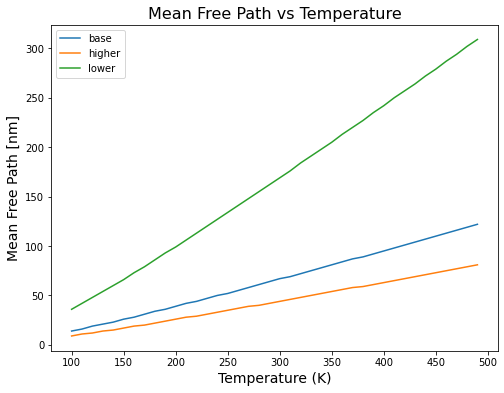

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(temperature_array, mean_free_path_array_base, label='base')
ax.plot(temperature_array, mean_free_path_array_higher, label='higher')
ax.plot(temperature_array, mean_free_path_array_lower, label='lower')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Mean Free Path [nm]', fontsize=14)
ax.set_title('Mean Free Path vs Temperature', fontsize=16)
ax.legend()

In [27]:
Env_base_temperature = Environment()
Env_higher_temperature = Environment(temperature=250 * u.K)
Env_lower_temperature = Environment(temperature= 250 * u.K)

Env_higher_temperature.molecular_weight = 500.97 * u.g / u.mol
Env_lower_temperature.molecular_weight = 4.97 * u.g / u.mol

pressure_array = np.arange(.1, 3, 0.01)

mean_free_path_array_base = np.zeros_like(pressure_array)
mean_free_path_array_higher = np.zeros_like(pressure_array)
mean_free_path_array_lower = np.zeros_like(pressure_array)

for i, pres in enumerate(pressure_array):
    Env_base_temperature.pressure = pres * u.atm
    mean_free_path_array_base[i] = Env_base_temperature.mean_free_path().to(u.nm).magnitude

    Env_higher_temperature.pressure = pres * u.atm
    mean_free_path_array_higher[i] = Env_higher_temperature.mean_free_path().to(u.nm).magnitude

    Env_lower_temperature.pressure = pres * u.atm
    mean_free_path_array_lower[i] = Env_lower_temperature.mean_free_path().to(u.nm).magnitude

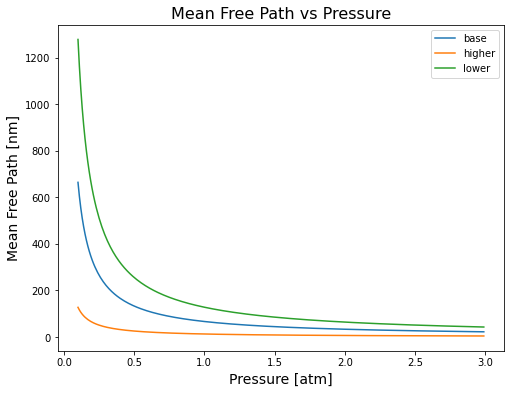

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(pressure_array, mean_free_path_array_base, label='base')
ax.plot(pressure_array, mean_free_path_array_higher, label='higher')
ax.plot(pressure_array, mean_free_path_array_lower, label='lower')
ax.set_xlabel('Pressure [atm]', fontsize=14)
ax.set_ylabel('Mean Free Path [nm]', fontsize=14)
ax.set_title('Mean Free Path vs Pressure', fontsize=16)
ax.legend()

## Particles 
All these molecule collisions have effects on particles in the air. The most important of these is the Brownian motion of particles. The Brownian motion of a particle is the random motion of a particle due to collisions with other molecules in the medium. This then results in molecule to particle collisions.

first we need a particle class

In [29]:
from particula import particle
help(particle)

Help on module particula.particle in particula:

NAME
    particula.particle - the particule class

CLASSES
    particula.vapor.Vapor(particula.environment.Environment)
        ParticleDistribution
            ParticleInstances
                ParticleCondensation
                    ParticleWallLoss
                        Particle
    
    class Particle(ParticleWallLoss)
     |  Particle(**kwargs)
     |  
     |  the Particle class!
     |  
     |  Method resolution order:
     |      Particle
     |      ParticleWallLoss
     |      ParticleCondensation
     |      ParticleInstances
     |      ParticleDistribution
     |      particula.vapor.Vapor
     |      particula.environment.Environment
     |      particula.environment.SharedProperties
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |      particle objects.
     |  
     |  coagulation(self, other: 'Particle' = None)
     |      Dimensioned particle--partic

In [37]:
# lets make a particle object.
Particle_sample = particle.Particle(particle_radius=100 * u.nm)
print(Particle_sample.particle_mass().to(u.ng))

4.188790204786391e-06 nanogram


 lets look at some of the properties of the particle

In [34]:
print('radius = ', Particle_sample.particle_radius.to(u.nm))
print('surface area = ', Particle_sample.particle_area().to(u.nm**2))
print('density = ', Particle_sample.particle_density.to(u.g / u.cm**3))

radius =  [100.0 200.0] nanometer
surface area =  [125663.70614359173 502654.8245743669] nanometer ** 2
density =  1.0000000000000002 gram / centimeter ** 3


 ### Charge of the particle
 some particles can be charged. This is important for the particle to particle interactions and it can enhance collisions with molecules. The charge of the particle is set by the user. The default is zero charge.

In [35]:
print('charge = ', Particle_sample.particle_charge)

charge =  0 dimensionless


 ### Particle to particle interactions
 when we get more than one particle in the air, they can interact with each other. This is important for aerosol formation and growth.

In [36]:
Particle_one = particle.Particle(particle_radius=100 * u.nm)
Particle_two = particle.Particle(particle_radius=100 * u.nm)

To run these coagulations, the pairwise interactions are needed so we setup the `coagulation` method to receive another particle object. 

In [42]:
# lets look at the collision frequency
Particle_one.coagulation(Particle_two).to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3
Particle_one.coagulation().to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3

array(1.05034745e-09) <Unit('cubic_centimeter / second')>

In [43]:
Particle_two = particle.Particle(particle_radius=10000 * u.nm)
Particle_one.coagulation(Particle_two).to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3

array(2.85841619e-08) <Unit('cubic_centimeter / second')>

In [44]:
Particle_two.coagulation(Particle_one).to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3

array(2.85841619e-08) <Unit('cubic_centimeter / second')>